In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Importando dataset olist

In [2]:
folder = 'queried_data/'

In [3]:
df = pd.read_csv(f'{folder}olist_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date'])
pd.set_option("display.max_columns", 50)
df.head()

,order_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delivery_lateness,review_score,customer_unique_id,customer_city,customer_state,seller_id,seller_city,seller_state,order_item_id,price,order_total_price,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:44,2017-05-24,2017-05-26 13:14:50,2 days 13:14:50,1.0,870a0bdc769f9a7870309036740e79ea,sao paulo,SP,f4aba7c0bca51484c30ab7bdc34bcdd1,sao paulo,SP,2,18.99,37.98,7.78,e67307ff0f15ade43fcb6e670be7a74c,beleza_saude,47.0,1474.0,3.0
1,001daeb0eddc45b999bad0801ad9d273,2017-05-17 23:19:34,2017-06-19,2017-06-08 15:34:07,-10 days -08:25:53,5.0,dc5aa19797b8fb7a4929ad109fb25553,itapicuru,BA,f45122a9ab94eb4f3f8953578bc0c560,piracicaba,SP,1,38.33,38.33,16.79,30c01cc81c9eb80469371743813789cc,pet_shop,59.0,732.0,4.0
2,001dbc16dc51075e987543d23a0507c7,2017-01-28 13:17:57,2017-03-20,2017-02-13 13:17:47,-34 days -10:42:13,5.0,c6f624cf0e9908fe310d59a80350bea0,santos dumont,MG,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1,69.90,69.90,18.00,777d2e438a1b645f3aec9bd57e92672c,cama_mesa_banho,58.0,689.0,1.0
3,001e7ba991be1b19605ca0316e7130f9,2017-03-18 11:47:37,2017-04-12,2017-03-28 14:23:33,-14 days -09:36:27,5.0,100bf2da12cc1fd1b556507aa87bf3a1,campo grande,MS,3340ef1913fb70d28420f6ceb685c339,maringa,PR,1,195.00,195.00,18.21,884fa3cd42986ba480ea2f8ae4e25ff7,informatica_acessorios,40.0,354.0,1.0
4,001e7cf2ad6bef3ade12ebc56ceaf0f3,2018-05-19 10:29:23,2018-06-05,2018-06-04 18:08:23,-05:51:37,1.0,43860f86362fea12550bfa19ef73015f,coromandel,MG,2a84855fd20af891be03bc5924d2b453,belo horizonte,MG,1,35.90,35.90,15.20,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude,26.0,394.0,1.0


In [4]:
df.dtypes

order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
delivery_lateness                        object
review_score                            float64
customer_unique_id                       object
customer_city                            object
customer_state                           object
seller_id                                object
seller_city                              object
seller_state                             object
order_item_id                             int64
price                                   float64
order_total_price                       float64
freight_value                           float64
product_id                               object
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      

In [5]:
df['order_estimated_delivery_date'] = df['order_estimated_delivery_date'].apply(lambda x: x - timedelta(days=1))
df['delivery_lateness_timedelta'] = df['order_delivered_customer_date'].dt.date - df['order_estimated_delivery_date'].dt.date
df['delivery_lateness_days'] = df['delivery_lateness_timedelta'].dt.days
df.drop(['delivery_lateness'], axis=1, inplace=True)
df.head()

,order_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_unique_id,customer_city,customer_state,seller_id,seller_city,seller_state,order_item_id,price,order_total_price,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,delivery_lateness_timedelta,delivery_lateness_days
0,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:44,2017-05-23,2017-05-26 13:14:50,1.0,870a0bdc769f9a7870309036740e79ea,sao paulo,SP,f4aba7c0bca51484c30ab7bdc34bcdd1,sao paulo,SP,2,18.99,37.98,7.78,e67307ff0f15ade43fcb6e670be7a74c,beleza_saude,47.0,1474.0,3.0,3 days,3.0
1,001daeb0eddc45b999bad0801ad9d273,2017-05-17 23:19:34,2017-06-18,2017-06-08 15:34:07,5.0,dc5aa19797b8fb7a4929ad109fb25553,itapicuru,BA,f45122a9ab94eb4f3f8953578bc0c560,piracicaba,SP,1,38.33,38.33,16.79,30c01cc81c9eb80469371743813789cc,pet_shop,59.0,732.0,4.0,-10 days,-10.0
2,001dbc16dc51075e987543d23a0507c7,2017-01-28 13:17:57,2017-03-19,2017-02-13 13:17:47,5.0,c6f624cf0e9908fe310d59a80350bea0,santos dumont,MG,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1,69.90,69.90,18.00,777d2e438a1b645f3aec9bd57e92672c,cama_mesa_banho,58.0,689.0,1.0,-34 days,-34.0
3,001e7ba991be1b19605ca0316e7130f9,2017-03-18 11:47:37,2017-04-11,2017-03-28 14:23:33,5.0,100bf2da12cc1fd1b556507aa87bf3a1,campo grande,MS,3340ef1913fb70d28420f6ceb685c339,maringa,PR,1,195.00,195.00,18.21,884fa3cd42986ba480ea2f8ae4e25ff7,informatica_acessorios,40.0,354.0,1.0,-14 days,-14.0
4,001e7cf2ad6bef3ade12ebc56ceaf0f3,2018-05-19 10:29:23,2018-06-04,2018-06-04 18:08:23,1.0,43860f86362fea12550bfa19ef73015f,coromandel,MG,2a84855fd20af891be03bc5924d2b453,belo horizonte,MG,1,35.90,35.90,15.20,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude,26.0,394.0,1.0,0 days,0.0


In [6]:
df['month'] = df['order_purchase_timestamp'].dt.month
df['year'] = df['order_purchase_timestamp'].dt.year
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')
df['hour'] = df['order_purchase_timestamp'].dt.hour

In [7]:
df.drop(df.loc[df['month_year'] == df['month_year'].max()].index, inplace=True)

In [8]:
df

,order_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_unique_id,customer_city,customer_state,seller_id,seller_city,seller_state,order_item_id,price,order_total_price,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,delivery_lateness_timedelta,delivery_lateness_days,month,year,month_year,hour
0,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:44,2017-05-23,2017-05-26 13:14:50,1.0,870a0bdc769f9a7870309036740e79ea,sao paulo,SP,f4aba7c0bca51484c30ab7bdc34bcdd1,sao paulo,SP,2,18.99,37.98,7.78,e67307ff0f15ade43fcb6e670be7a74c,beleza_saude,47.0,1474.0,3.0,3 days,3.0,5,2017,2017-05,17
1,001daeb0eddc45b999bad0801ad9d273,2017-05-17 23:19:34,2017-06-18,2017-06-08 15:34:07,5.0,dc5aa19797b8fb7a4929ad109fb25553,itapicuru,BA,f45122a9ab94eb4f3f8953578bc0c560,piracicaba,SP,1,38.33,38.33,16.79,30c01cc81c9eb80469371743813789cc,pet_shop,59.0,732.0,4.0,-10 days,-10.0,5,2017,2017-05,23
2,001dbc16dc51075e987543d23a0507c7,2017-01-28 13:17:57,2017-03-19,2017-02-13 13:17:47,5.0,c6f624cf0e9908fe310d59a80350bea0,santos dumont,MG,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1,69.90,69.90,18.00,777d2e438a1b645f3aec9bd57e92672c,cama_mesa_banho,58.0,689.0,1.0,-34 days,-34.0,1,2017,2017-01,13
3,001e7ba991be1b19605ca0316e7130f9,2017-03-18 11:47:37,2017-04-11,2017-03-28 14:23:33,5.0,100bf2da12cc1fd1b556507aa87bf3a1,campo grande,MS,3340ef1913fb70d28420f6ceb685c339,maringa,PR,1,195.00,195.00,18.21,884fa3cd42986ba480ea2f8ae4e25ff7,informatica_acessorios,40.0,354.0,1.0,-14 days,-14.0,3,2017,2017-03,11
4,001e7cf2ad6bef3ade12ebc56ceaf0f3,2018-05-19 10:29:23,2018-06-04,2018-06-04 18:08:23,1.0,43860f86362fea12550bfa19ef73015f,coromandel,MG,2a84855fd20af891be03bc5924d2b453,belo horizonte,MG,1,35.90,35.90,15.20,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude,26.0,394.0,1.0,0 days,0.0,5,2018,2018-05,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,f90185ee34b0b34c876b408aa6a5686b,2018-06-10 12:11:41,2018-06-19,2018-06-12 18:42:25,5.0,30f21e5e86c79c2c6e01ca00f1eb2e28,jundiai,SP,77a515caa36327151d1cc6c32a9f00e1,diadema,SP,1,78.00,78.00,7.41,01b154ceb5457897eb28b9e549f28219,papelaria,54.0,447.0,1.0,-7 days,-7.0,6,2018,2018-06,12
113310,f90202d14e468090464aeb4b1f0372ab,2018-05-17 08:33:19,2018-06-03,2018-06-01 23:27:31,5.0,b0608ebf65dbde33b45973a50e9f8965,sao paulo,SP,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,1,96.00,96.00,6.56,0a57f7d2c983bcf8188589a5fea4a8da,relogios_presentes,33.0,932.0,1.0,-2 days,-2.0,5,2018,2018-05,8
113311,f9021afbb4a99d23f8e0adc2c702ad95,2018-04-16 19:18:41,2018-04-29,2018-04-18 16:03:57,5.0,2441d92ac54268a961655189899f25ca,sao paulo,SP,b18dc380845b24038cfc48006478f099,diadema,SP,1,179.99,179.99,9.02,e178e8610a35f4d6c9b0934fb5e20e85,beleza_saude,33.0,577.0,1.0,-11 days,-11.0,4,2018,2018-04,19
113312,f9022d41bd1362ddd75ad882b31304cd,2017-11-23 08:53:23,2017-12-10,2017-12-08 20:08:57,5.0,6f0439326aafc4f70f3a90c62e059290,londrina,PR,e59aa562b9f8076dd550fcddf0e73491,curitiba,PR,1,415.00,415.00,20.59,423a6644f0aa529e8828ff1f91003690,agro_industria_e_comercio,54.0,2352.0,3.0,-2 days,-2.0,11,2017,2017-11,8


# Pedidos por mês, mês do ano e hora

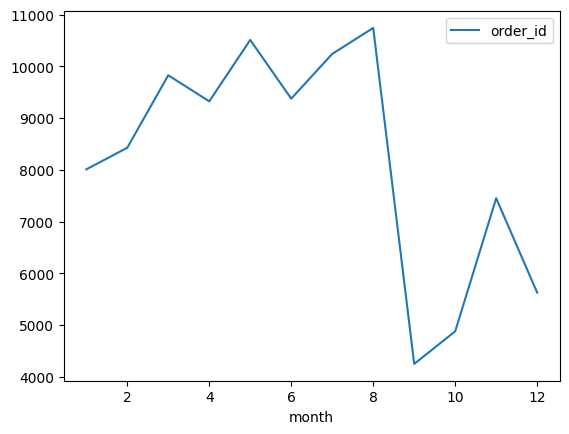

In [9]:
month_orders = df.groupby('month').agg({'order_id':'nunique'})
month_orders.plot() # Historicamente agosto foi o melhor mês de vendas
plt.show()

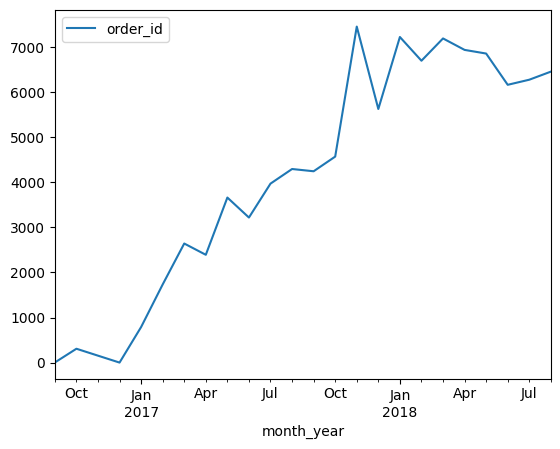

In [10]:
month_year_orders = df.groupby('month_year').agg({'order_id':'nunique'})
month_year_orders.plot() # Novembro de 2017 foi o melhor mês de vendas. Até então houve rápido crescimento e posterior estabilização na quantidade de pedidos
plt.show()

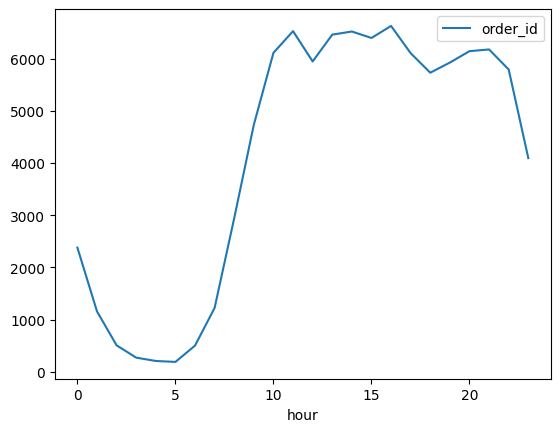

In [11]:
hour_orders = df.groupby('hour').agg({'order_id':'nunique'})
hour_orders.plot()
plt.show()

# Perfil dos pedidos

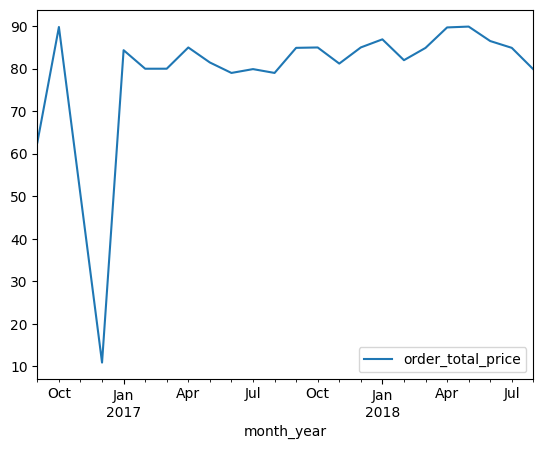

In [12]:
month_year_order_price = df.groupby('month_year').agg({'order_total_price':'median'})
month_year_order_price.plot()
plt.show()

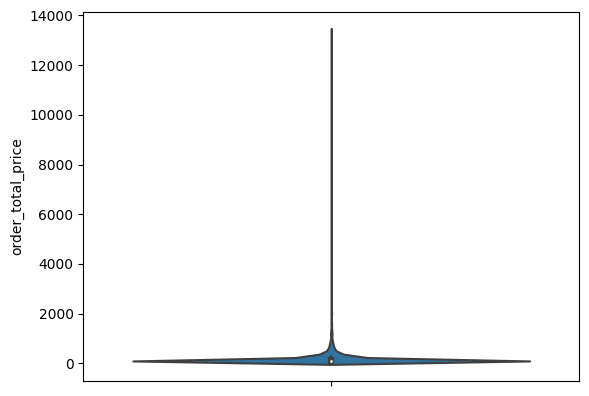

In [13]:
sns.violinplot(y='order_total_price', data=df)
plt.show()

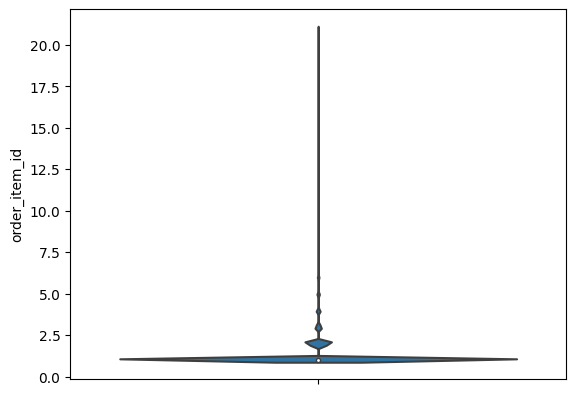

In [14]:
sns.violinplot(y='order_item_id', data=df)
plt.show()

In [15]:
categories = df.groupby('product_category_name').agg({'order_id':'nunique'})

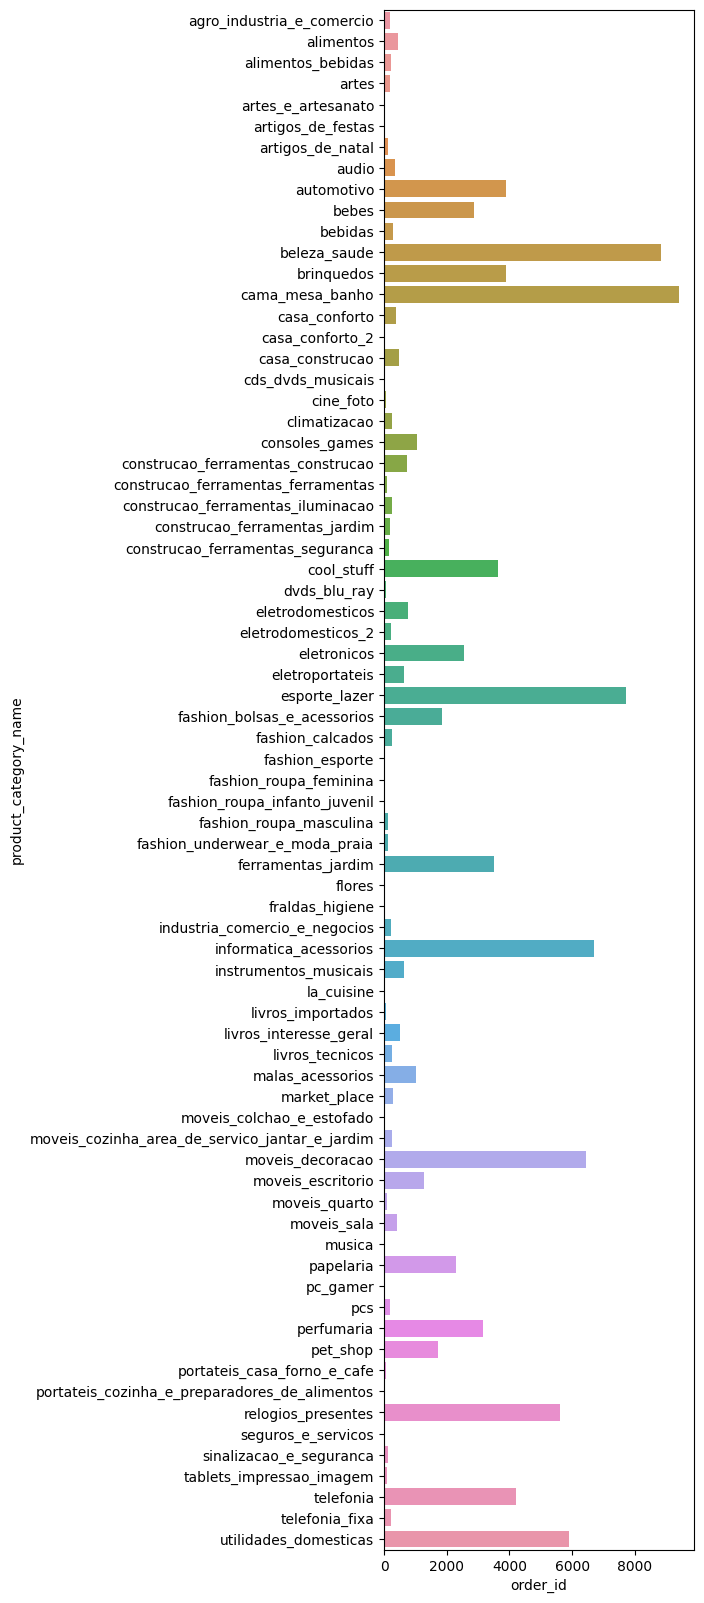

In [16]:
fig = plt.figure()
sns.barplot(y=categories.index, x='order_id', data=categories)
fig.set_size_inches(4, 20)
plt.show()

# Perfil dos anúncios

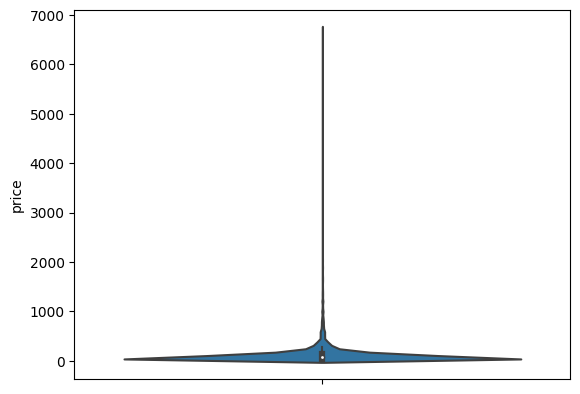

In [17]:
sns.violinplot(y='price', data=df)
plt.show()

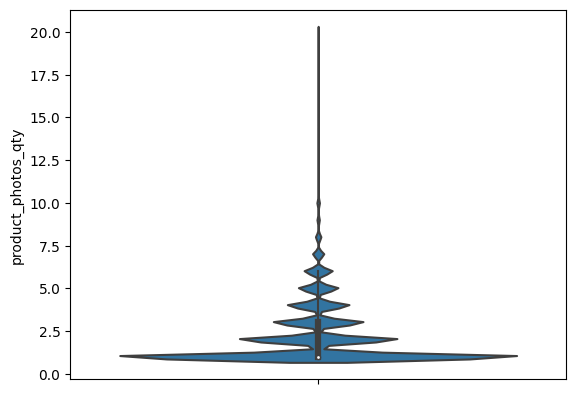

In [18]:
sns.violinplot(y='product_photos_qty', data=df)
plt.show()

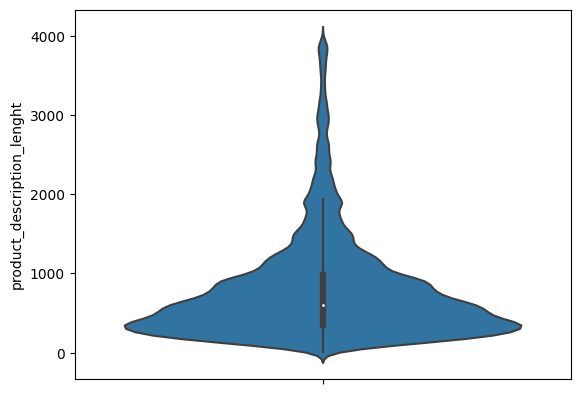

In [19]:
sns.violinplot(y='product_description_lenght', data=df)
plt.show()

In [20]:
df['product_description_lenght'].mean()

786.901137859106

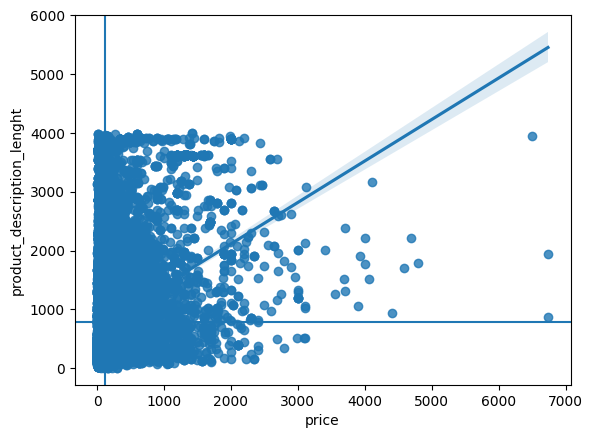

In [21]:
g = sns.regplot(y='product_description_lenght', x='price', data=df)
g.axhline(df['product_description_lenght'].mean())
g.axvline(df['price'].mean())
plt.show() # Produtos caros tendem a ter anúncios com descrições mais longas que a mediana

# Vendedores ativos por mês

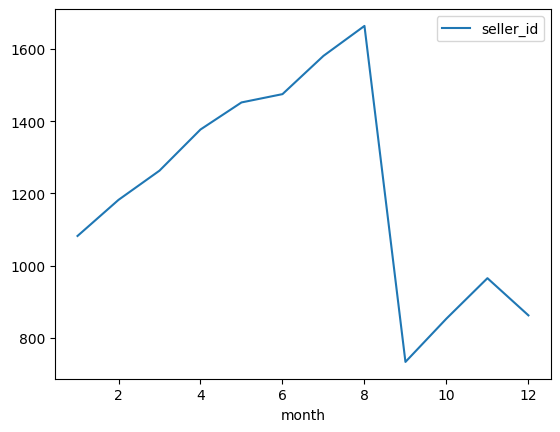

In [22]:
sellers = df.groupby('month').agg({'seller_id':'nunique'})
sellers.plot() # Coincide com gráfico de histórico mensal de pedidos
plt.show()

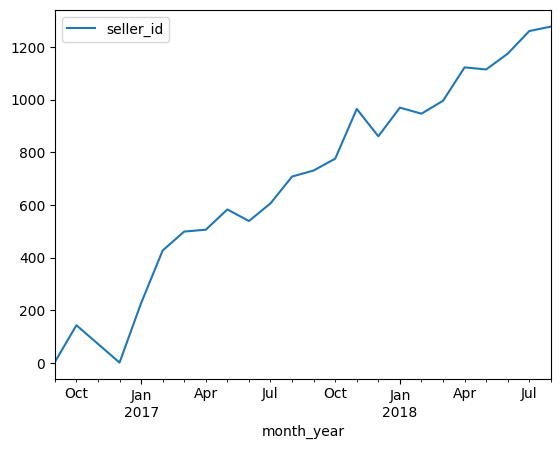

In [23]:
sellers = df.groupby('month_year').agg({'seller_id':'nunique'})
sellers.plot() # Quantidade de vendedores em rápido crescimento
plt.show()

# Correlation between number of sellers and number of orders

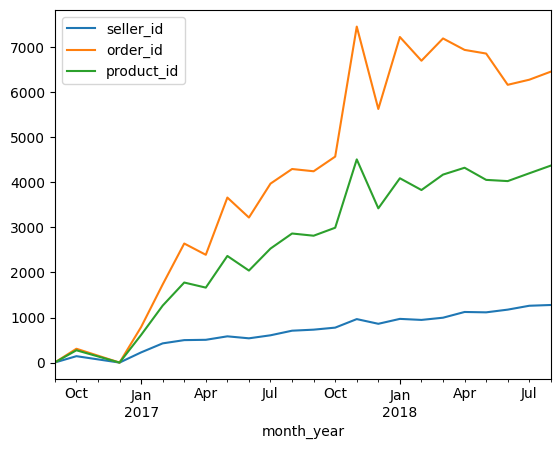

In [24]:
sellers_orders = df.groupby('month_year').agg({'seller_id':'nunique', 'order_id':'nunique', 'product_id':'nunique'})
sellers_orders.plot() # Quantidade de pedidos é fortemente correlacionada com quantidade de produtos
plt.show()

Hipotéticamente, como os dados de produtos cadastrados não estão disponíveis, se poderia argumentar que não há relação entre a quantidade de produtos e a quantidade de pedidos, porém a forte correlação entre quantidade de produtos e quantidade de pedidos sugerre que a imensa maioria dos pedidos são referentes a produtos distintos. Ou seja, cada novo produto cadastrado tem uma quantidade significativa de vendas. Sendo assim improvável que exista uma flutuação significativa na quantidade de produtos que não são comprados.

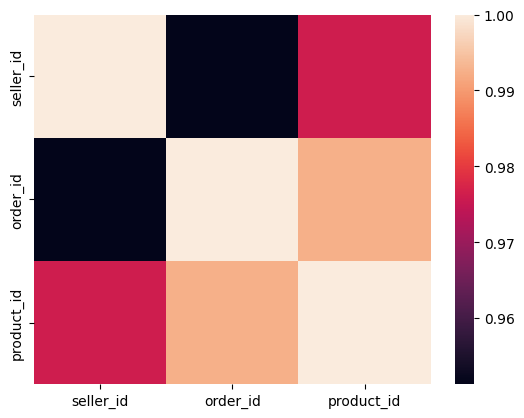

In [25]:
cols = ['seller_id', 'order_id', 'product_id']
sns.heatmap(sellers_orders[cols].corr())
plt.show()

In [26]:
sellers_orders[cols].corr()

,seller_id,order_id,product_id
seller_id,1.000000,0.951273,0.976101
order_id,0.951273,1.000000,0.992472
product_id,0.976101,0.992472,1.000000


In [27]:
products = df.groupby('product_id').agg({'seller_id':'nunique', 'order_id':'nunique'})

In [28]:
products['seller_id'].mean() # Cada produto está disponibilizado em média por 1.04 vendedores

1.0454310946557008

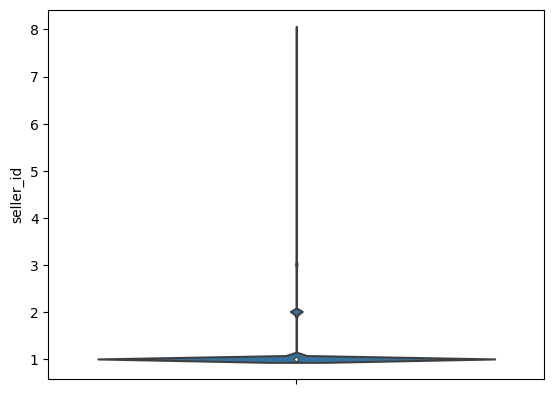

In [29]:
sns.violinplot(y='seller_id', data=products)
plt.show()

In [30]:
products['order_id'].mean() # Cada produto é pedido em média 3.11 vezes

3.108373038754514

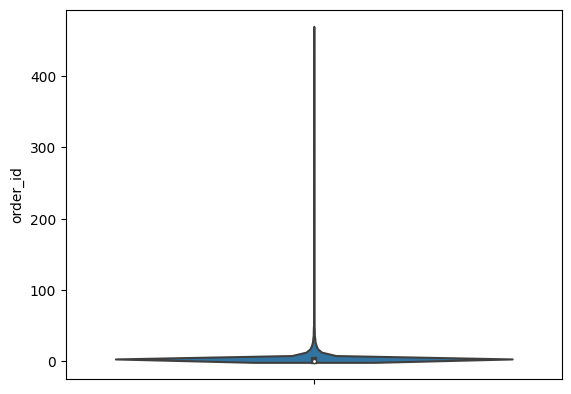

In [31]:
sns.violinplot(y='order_id', data=products)
plt.show()

In [32]:
sellers = df.groupby('seller_id').agg({'product_id':'nunique', 'order_id':'nunique'})

In [33]:
sellers['product_id'].median()

4.0

In [34]:
sellers['product_id'].mean() # Cada vendedor tem em média 11 produtos, mas cada produto na maioria das vezes só tem 1 vendedor

11.13021001615509

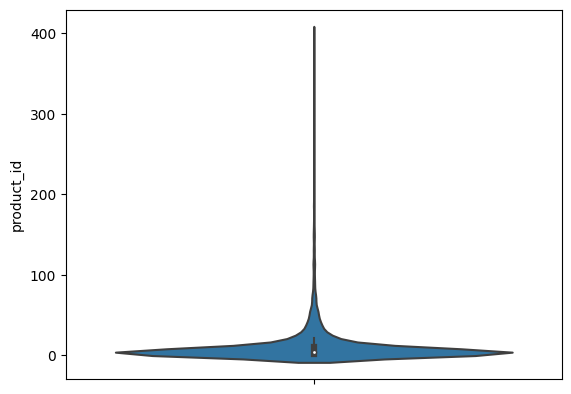

In [35]:
sns.violinplot(y='product_id', data=sellers)
plt.show()

In [36]:
sellers['order_id'].median()

6.0

In [37]:
sellers['order_id'].mean()

32.31308562197092

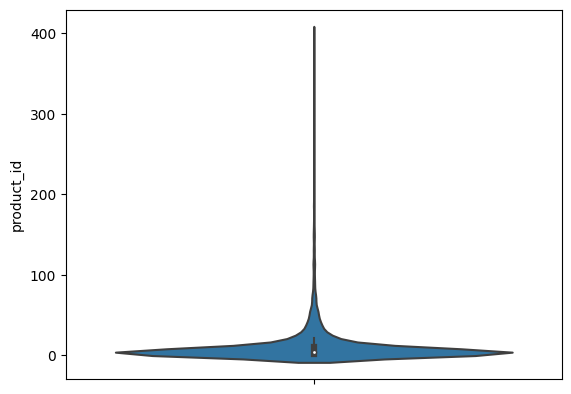

In [38]:
sns.violinplot(y='product_id', data=sellers)
plt.show()

Se os produtos forem duplicatas, os anúncios também serão duplicados, dois anúncios provavelmente terão mais vendas do que um. Se os produtos não forem duplicados, cada vendedor coloca na plataforma produtos novos e expande a quantidade de clientes em potencial por atingir nichos previamente não explorados.

In [39]:
sellers_orders

,seller_id,order_id,product_id
month_year,,,
2016-09,3,3,4
2016-10,143,308,274
2016-12,1,1,1
2017-01,227,789,614
2017-02,427,1733,1264
2017-03,499,2641,1776
2017-04,506,2391,1663
2017-05,583,3660,2365
2017-06,539,3217,2041


In [40]:
sellers_orders_melt = pd.melt(sellers_orders.reset_index(), id_vars=['month_year'], value_vars=['seller_id', 'order_id', 'product_id'])

In [41]:
sellers_orders_melt

,month_year,variable,value
0,2016-09,seller_id,3
1,2016-10,seller_id,143
2,2016-12,seller_id,1
3,2017-01,seller_id,227
4,2017-02,seller_id,427
...,...,...,...
64,2018-04,product_id,4321
65,2018-05,product_id,4052
66,2018-06,product_id,4025
67,2018-07,product_id,4198


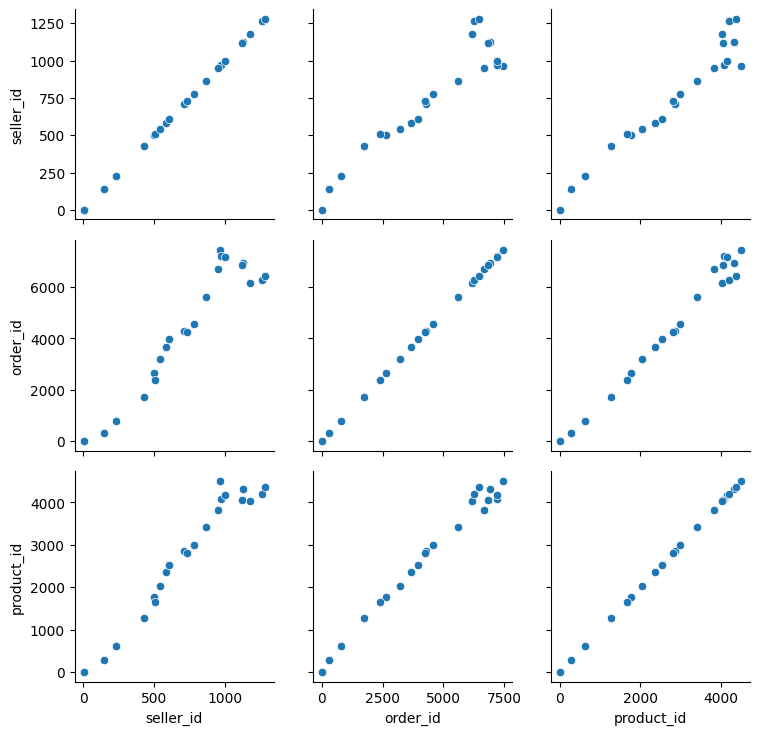

In [42]:
g = sns.PairGrid(sellers_orders)
g.map(sns.scatterplot)
g.add_legend()
plt.show()

In [43]:
# sellers_orders.to_csv('sellers_orders.csv')

In [44]:
# sellers_orders_melt.to_csv('sellers_orders_melt.csv')

# Crescimento de categorias

In [45]:
categories = df.groupby('month_year').agg({'product_category_name':'nunique'})

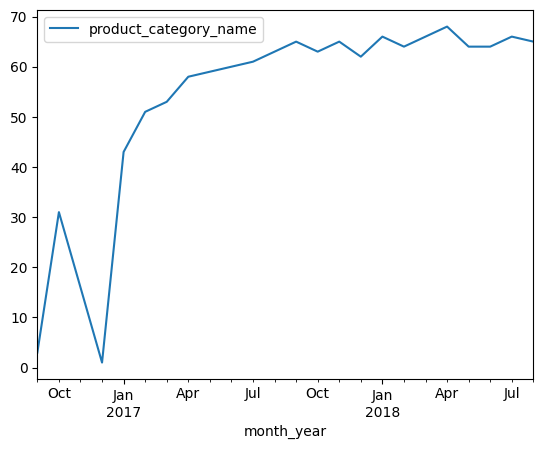

In [46]:
categories.plot()
plt.show()

# Satisfação do consumidor

In [47]:
df['review_score'].mean()

4.032499488302142

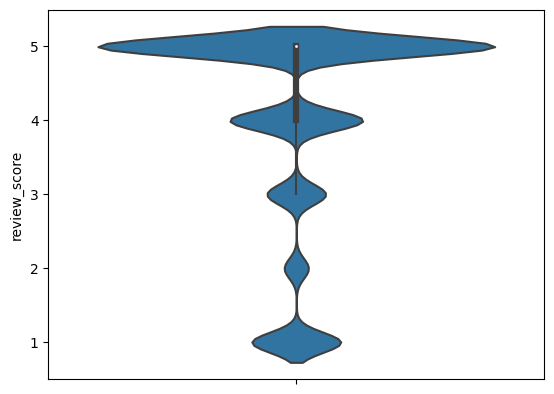

In [48]:
sns.violinplot(y='review_score', data=df)
plt.show()

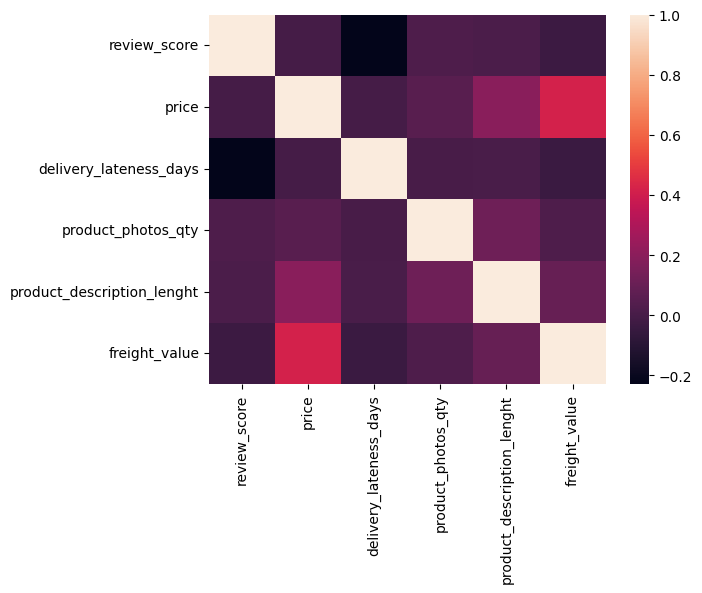

In [49]:
cols = ['review_score', 'price', 'delivery_lateness_days', 'product_photos_qty', 'product_description_lenght', 'freight_value']
sns.heatmap(df[cols].corr()) # Valor do frete é correlacionado com preço do produto, sugerindo que produtos mais caros são maiores ou mais pesados
plt.show()

In [50]:
df[cols].corr()

,review_score,price,delivery_lateness_days,product_photos_qty,product_description_lenght,freight_value
review_score,1.000000,-0.003938,-0.229030,0.022612,0.013154,-0.036178
price,-0.003938,1.000000,-0.003504,0.051955,0.198165,0.414349
delivery_lateness_days,-0.229030,-0.003504,1.000000,0.005336,0.006805,-0.039950
product_photos_qty,0.022612,0.051955,0.005336,1.000000,0.118946,0.022648
product_description_lenght,0.013154,0.198165,0.006805,0.118946,1.000000,0.094050
freight_value,-0.036178,0.414349,-0.039950,0.022648,0.094050,1.000000


# Per category

In [51]:
pd.set_option('display.max_rows', 100)
cat = df.groupby('product_category_name').agg({'review_score':'mean', 'order_id':'nunique', 'order_total_price':['median', 'sum'], 'order_item_id':'mean', 'seller_id':'nunique'})
cat.corr() # Sum of order total price sold per category is highly correlated with amount of orders
           # Quantidade de vendedores por categoria é fortemente correlacionada com quantidade de vendas por categoria

review_score  order_id order_total_price            \
                                  mean   nunique            median       sum   
review_score      mean        1.000000  0.038207          0.029656  0.022457   
order_id          nunique     0.038207  1.000000         -0.088353  0.966626   
order_total_price median      0.029656 -0.088353          1.000000  0.012283   
                  sum         0.022457  0.966626          0.012283  1.000000   
order_item_id     mean       -0.266039  0.026711         -0.077061  0.050544   
seller_id         nunique     0.094796  0.881128         -0.103312  0.840893   

                          order_item_id seller_id  
                                   mean   nunique  
review_score      mean        -0.266039  0.094796  
order_id          nunique      0.026711  0.881128  
order_total_price median      -0.077061 -0.103312  
                  sum          0.050544  0.840893  
order_item_id     mean         1.000000  0.047448  
seller_id         nunique      0.047448  1.000000

In [52]:
cat

review_score order_id  \
                                                       mean  nunique   
product_category_name                                                  
agro_industria_e_comercio                          4.000000      182   
alimentos                                          4.218182      450   
alimentos_bebidas                                  4.315412      227   
artes                                              3.937198      202   
artes_e_artesanato                                 4.125000       23   
artigos_de_festas                                  3.767442       39   
artigos_de_natal                                   4.020548      128   
audio                                              3.825485      350   
automotivo                                         4.065512     3897   
bebes                                              4.011811     2885   
bebidas                                            4.047745      297   
beleza_saude                                       4.142768     8836   
brinquedos                                         4.158641     3886   
cama_mesa_banho                                    3.895663     9417   
casa_conforto                                      3.829885      397   
casa_conforto_2                                    3.629630       24   
casa_construcao                                    3.940000      490   
cds_dvds_musicais                                  4.642857       12   
cine_foto                                          4.205479       65   
climatizacao                                       3.969178      253   
consoles_games                                     4.023070     1062   
construcao_ferramentas_construcao                  4.052916      748   
construcao_ferramentas_ferramentas                 4.444444       97   
construcao_ferramentas_iluminacao                  4.054054      244   
construcao_ferramentas_jardim                      4.054167      194   
construcao_ferramentas_seguranca                   3.844560      167   
cool_stuff                                         4.146341     3632   
dvds_blu_ray                                       4.079365       59   
eletrodomesticos                                   4.172457      764   
eletrodomesticos_2                                 4.142857      234   
eletronicos                                        4.037468     2550   
eletroportateis                                    4.149188      630   
esporte_lazer                                      4.107986     7720   
fashion_bolsas_e_acessorios                        4.144679     1864   
fashion_calcados                                   4.233716      240   
fashion_esporte                                    4.258065       27   
fashion_roupa_feminina                             3.780000       39   
fashion_roupa_infanto_juvenil                      4.500000        8   
fashion_roupa_masculina                            3.641221      112   
fashion_underwear_e_moda_praia                     3.976923      121   
ferramentas_jardim                                 4.042735     3518   
flores                                             4.419355       29   
fraldas_higiene                                    3.256410       27   
industria_comercio_e_negocios                      4.101504      235   
informatica_acessorios                             3.930819     6689   
instrumentos_musicais                              4.152593      628   
la_cuisine                                         4.000000       13   
livros_importados                                  4.400000       53   
livros_interesse_geral                             4.446266      512   
livros_tecnicos                                    4.368421      260   
malas_acessorios                                   4.315257     1034   
market_place                                       4.019417      280   
moveis_colchao_e_estofado                          3.815789       38   
moveis_cozinha_

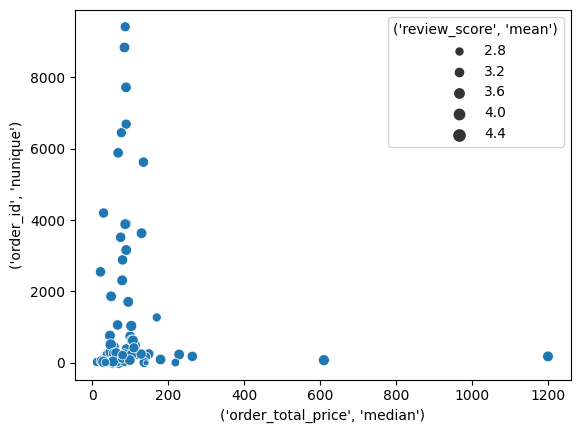

In [53]:
sns.scatterplot(y=cat['order_id', 'nunique'], x=cat['order_total_price', 'median'], size=cat['review_score', 'mean'], data=cat)
plt.show() # Categorias mais caras tem menos vendas

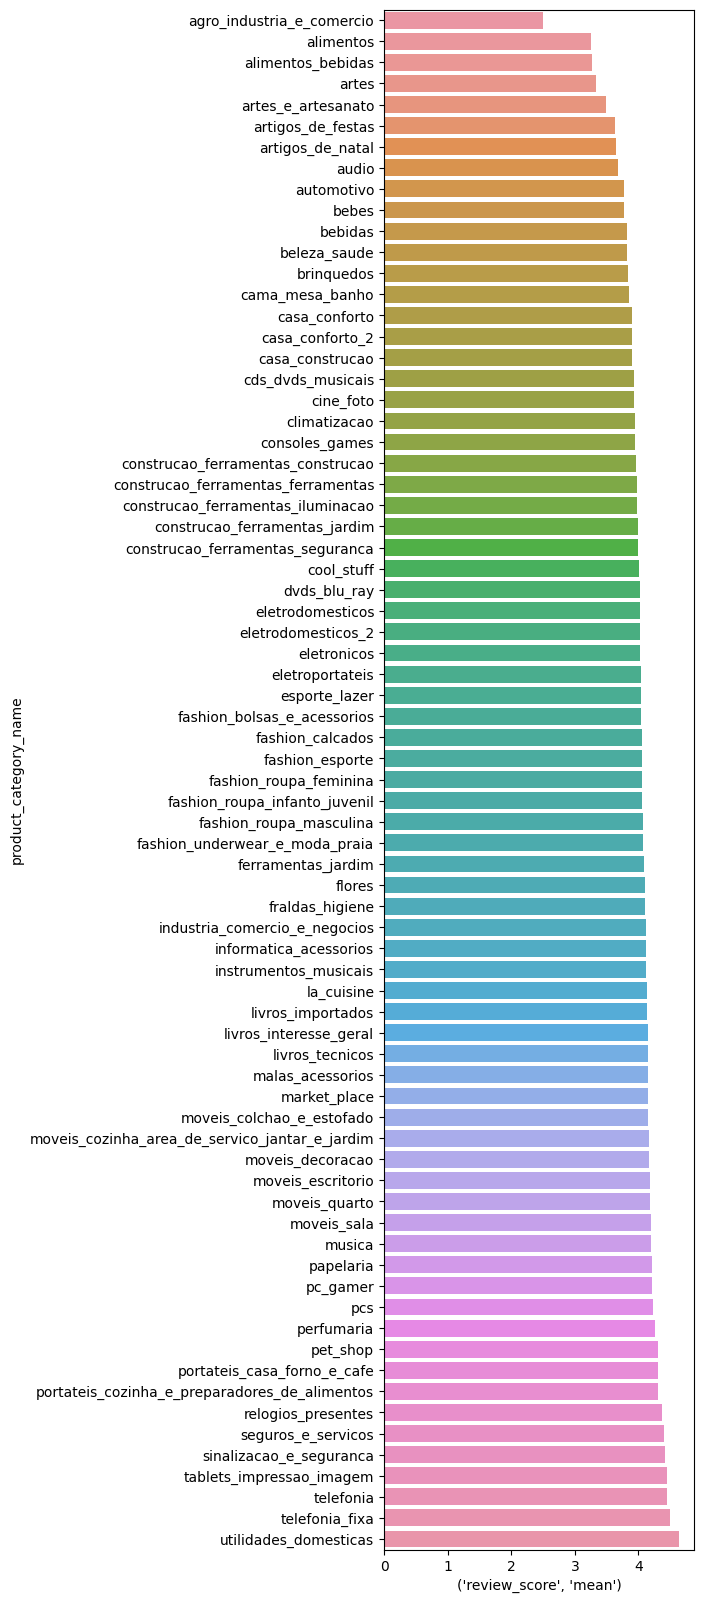

In [54]:
cat_review_score = cat.sort_values(by=[('review_score', 'mean')])
fig = plt.figure()
sns.barplot(y=cat.index, x=cat_review_score['review_score', 'mean'] , data=cat_review_score)
fig.set_size_inches(4, 20)
plt.show()

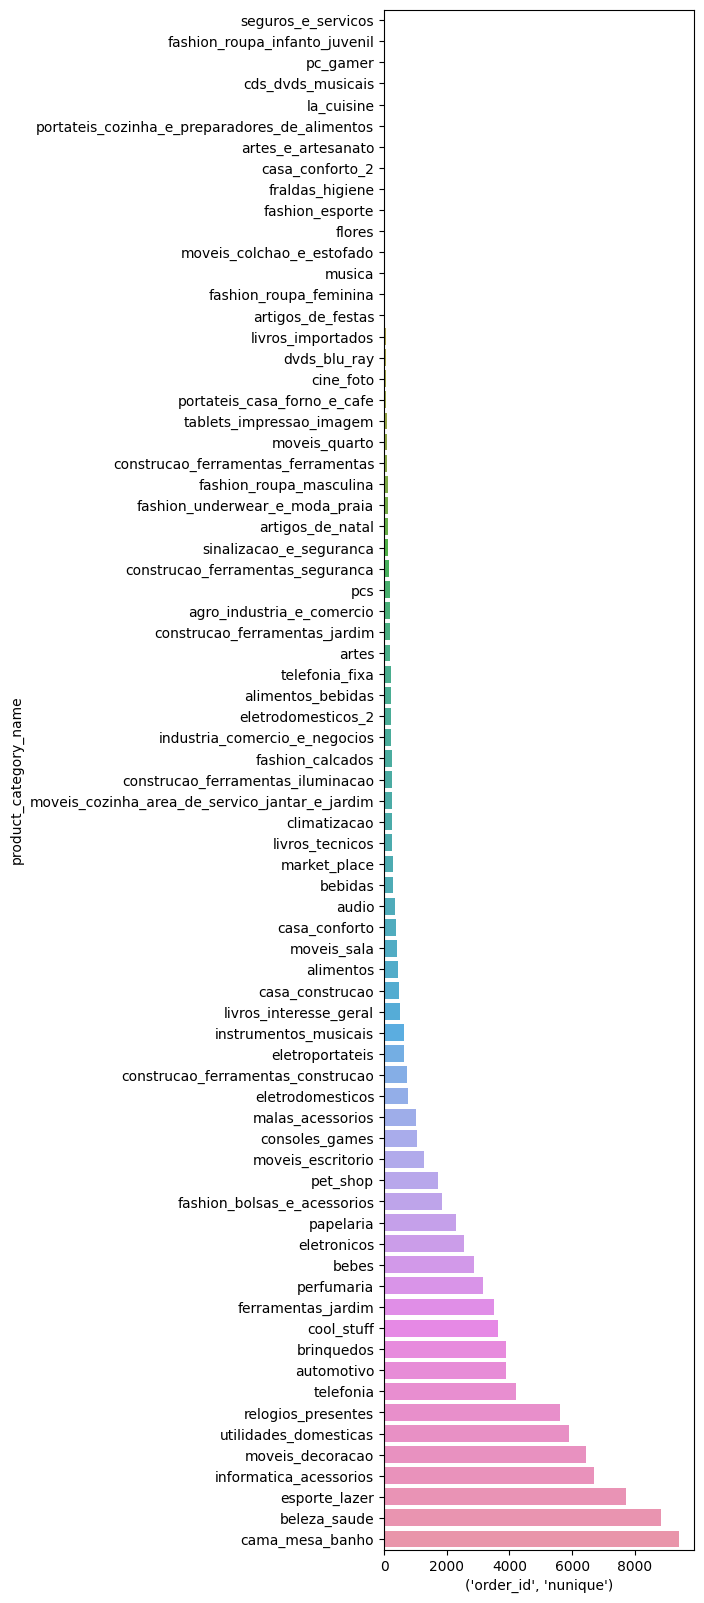

In [55]:
cat_order_id = cat.sort_values(by=[('order_id', 'nunique')])
fig = plt.figure()
sns.barplot(y=cat_order_id.index, x=cat_order_id['order_id', 'nunique'], data=cat_order_id)
fig.set_size_inches(4, 20)
plt.show()

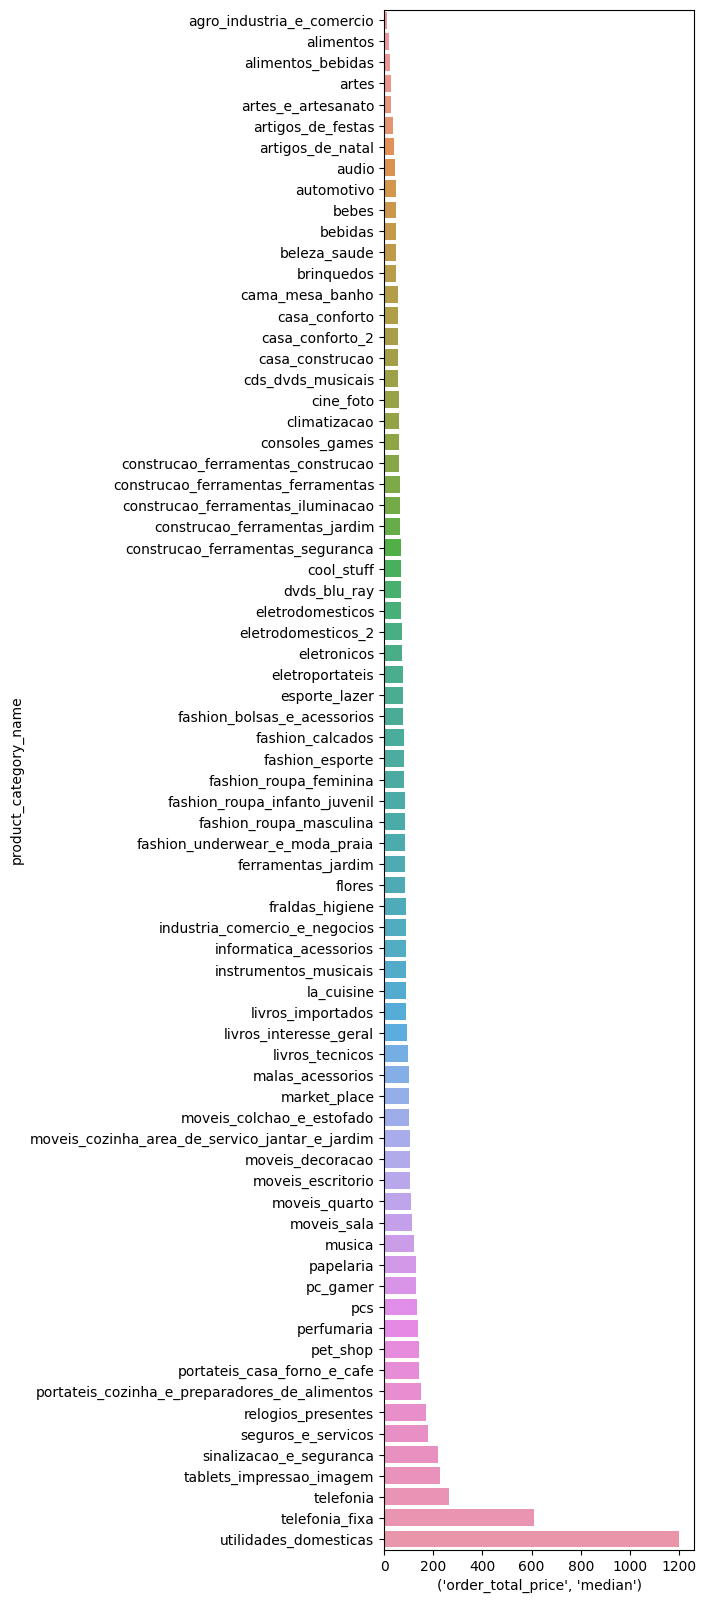

In [56]:
cat_order_total_price = cat.sort_values(by=[('order_total_price', 'median')])
fig = plt.figure()
sns.barplot(y=cat.index, x=('order_total_price', 'median'), data=cat_order_total_price)
fig.set_size_inches(4, 20)
plt.show() # Utilidades domésticas tem maior preço mediano e maior avaliação média, tendência similar com categorias com produtos de maior valor médio

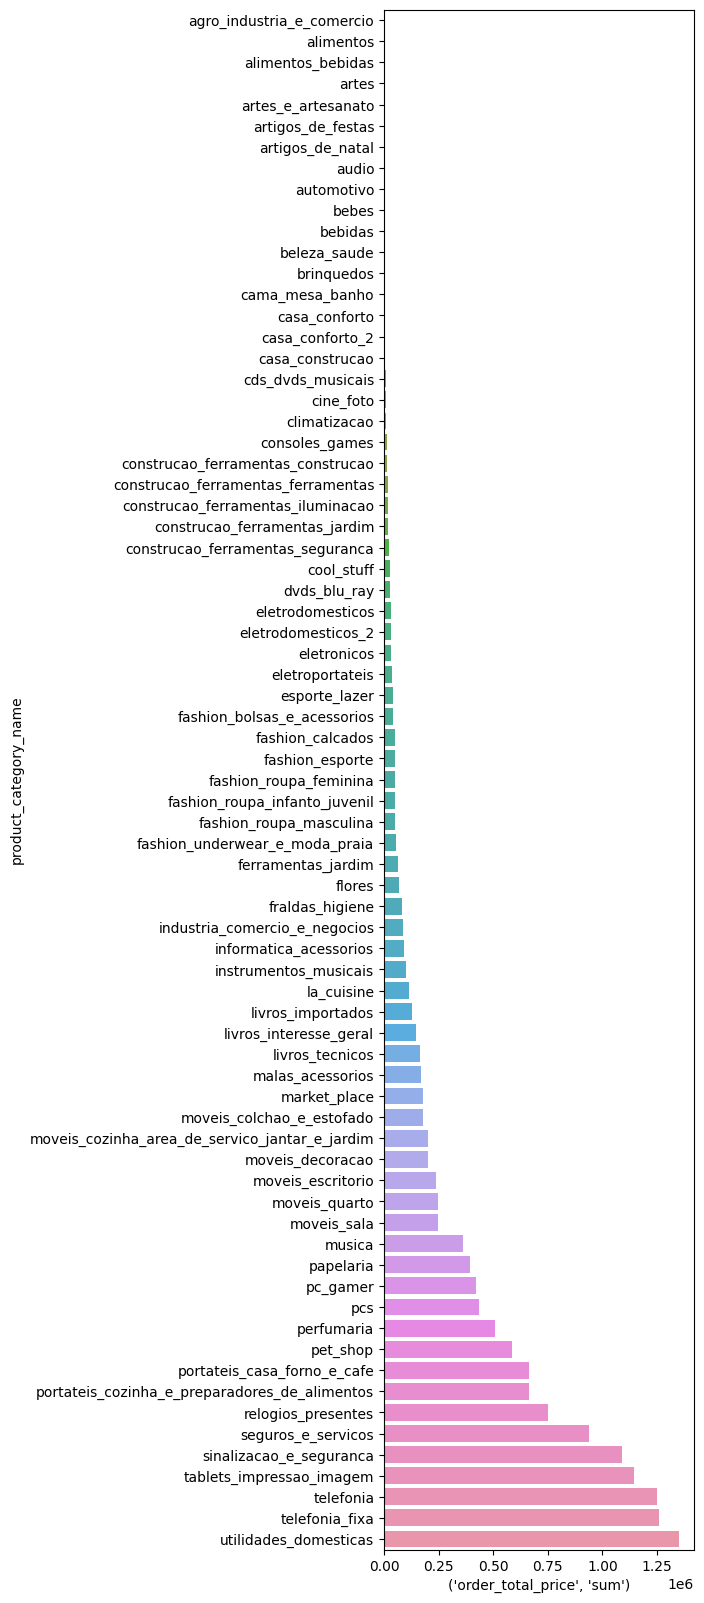

In [57]:
cat_order_total_price = cat.sort_values(by=[('order_total_price', 'sum')])
fig = plt.figure()
sns.barplot(y=cat.index, x=('order_total_price', 'sum'), data=cat_order_total_price)
fig.set_size_inches(4, 20)
plt.show()

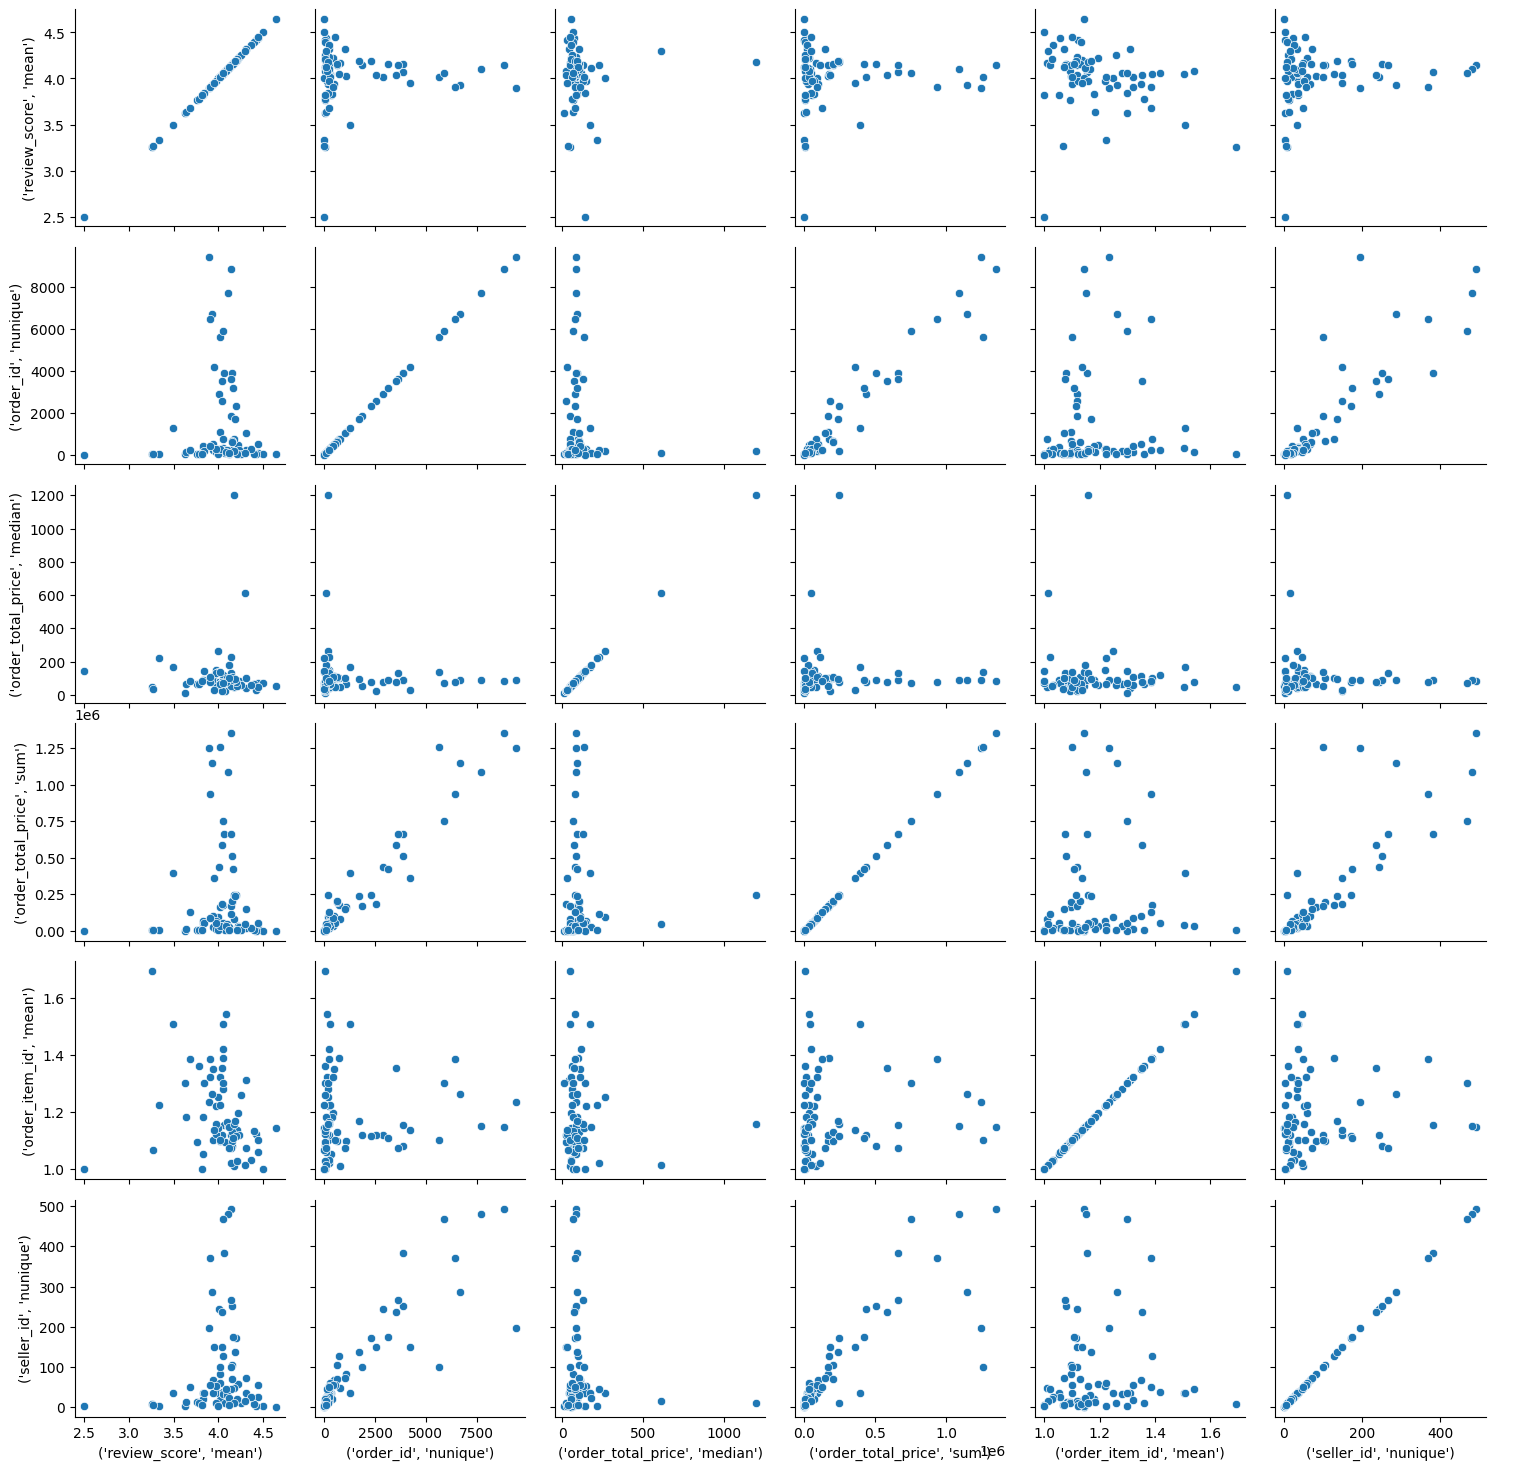

In [58]:
g = sns.PairGrid(cat)
g.map(sns.scatterplot)
g.add_legend()
plt.show()

## Porcentagem de valor vendido por categoria

In [59]:
cat['order_total_price_%'] = cat[('order_total_price', 'sum')] / cat[('order_total_price', 'sum')].sum()
cat['order_total_price_%'].sort_values()

product_category_name
seguros_e_servicos                                0.000019
fashion_roupa_infanto_juvenil                     0.000037
cds_dvds_musicais                                 0.000054
casa_conforto_2                                   0.000057
flores                                            0.000082
artes_e_artesanato                                0.000123
pc_gamer                                          0.000124
la_cuisine                                        0.000145
fraldas_higiene                                   0.000148
fashion_esporte                                   0.000164
fashion_roupa_feminina                            0.000231
portateis_cozinha_e_preparadores_de_alimentos     0.000261
moveis_colchao_e_estofado                         0.000286
artigos_de_festas                                 0.000307
livros_importados                                 0.000344
musica                                            0.000397
dvds_blu_ray                      

In [60]:
cat['order_total_price_%'][['cama_mesa_banho', 'moveis_decoracao', 'utilidades_domesticas', 'moveis_escritorio', 'moveis_sala', 'casa_conforto', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'artigos_de_natal', 'moveis_quarto', 'artigos_de_festas', 'moveis_colchao_e_estofado', 'casa_conforto_2']].sum() # Casa e decoração (mercado 14%)

0.23481503790865776

In [61]:
cat['order_total_price_%'][['beleza_saude', 'perfumaria']].sum() # Perfumaria e cosméticos + saúde (mercado 12+6 %)

0.11608077442791491

In [62]:
cat['order_total_price_%'][['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_esporte', 'fashion_roupa_infanto_juvenil']].sum() # Moda e acessórios (mercado 11%)

0.014549150567346718

In [63]:
cat['order_total_price_%'][['eletrodomesticos', 'eletroportateis', 'climatizacao', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos']].sum() # Eletrodomésticos (mercado 10%)

0.03384738441377194

In [64]:
cat['order_total_price_%'][['alimentos', 'bebidas']].sum() # Alimentos e bebidas (mercado 7%)

0.00481784175889113

In [65]:
cat['order_total_price_%'][['esporte_lazer']].sum() # Esporte e lazer (mercado 7%)

0.07127064970218894

Fonte dados de mercado: 45ª edição do Webshoppers, NielsenIQ Ebit, 2021

As categorias que mais vendem são casa e decoração, com 14% do total vendido, perfumaria e cosméticos, aqui agregada com saúde, com 12 e 6% respectivamente, moda e acessórios (11%), eletrodomésticos (10%) e alimentos e bebidas (7%)

## Porcentagem de quantidade de vendas por categoria

In [66]:
cat['order_id_%'] = cat['order_id'] / cat['order_id'].sum()

In [67]:
cat['order_id_%'].sort_values()

product_category_name
seguros_e_servicos                                0.000020
fashion_roupa_infanto_juvenil                     0.000082
pc_gamer                                          0.000082
cds_dvds_musicais                                 0.000122
la_cuisine                                        0.000133
portateis_cozinha_e_preparadores_de_alimentos     0.000143
artes_e_artesanato                                0.000235
casa_conforto_2                                   0.000245
fraldas_higiene                                   0.000275
fashion_esporte                                   0.000275
flores                                            0.000296
moveis_colchao_e_estofado                         0.000388
musica                                            0.000388
fashion_roupa_feminina                            0.000398
artigos_de_festas                                 0.000398
livros_importados                                 0.000541
dvds_blu_ray                      

In [68]:
cat['order_id_%'][['cama_mesa_banho', 'moveis_decoracao', 'utilidades_domesticas', 'moveis_escritorio', 'moveis_sala', 'casa_conforto', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'artigos_de_natal', 'moveis_quarto', 'artigos_de_festas', 'moveis_colchao_e_estofado', 'casa_conforto_2']].sum() # Casa e decoração

0.24906649799016506

In [69]:
cat['order_id_%'][['beleza_saude', 'perfumaria']].sum() # Perfumaria e cosméticos + saúde

0.12240608867758981

In [70]:
cat['order_id_%'][['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_esporte', 'fashion_roupa_infanto_juvenil']].sum() # Moda e acessórios

0.02459752290395642

In [71]:
cat['order_id_%'][['eletrodomesticos', 'eletroportateis', 'climatizacao', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos']].sum() # Eletrodomésticos

0.02009834928278479

In [72]:
cat['order_id_%'][['alimentos', 'bebidas']].sum() # Alimentos e bebidas

0.007621049195045807

In [73]:
cat['order_id_%'][['esporte_lazer']].sum() # Esporte e lazer

0.07876104388989777

## Porcentagem de vendedores por categoria

In [74]:
cat['seller_id_%'] = cat[('seller_id', 'nunique')] / cat[('seller_id', 'nunique')].sum()

In [75]:
cat.sort_values(by='seller_id_%')

review_score order_id  \
                                                       mean  nunique   
product_category_name                                                  
cds_dvds_musicais                                  4.642857       12   
seguros_e_servicos                                 2.500000        2   
pc_gamer                                           3.333333        8   
la_cuisine                                         4.000000       13   
flores                                             4.419355       29   
casa_conforto_2                                    3.629630       24   
fashion_roupa_infanto_juvenil                      4.500000        8   
portateis_cozinha_e_preparadores_de_alimentos      3.266667       14   
moveis_colchao_e_estofado                          3.815789       38   
tablets_impressao_imagem                           4.123457       79   
livros_importados                                  4.400000       53   
fraldas_higiene                                    3.256410       27   
fashion_underwear_e_moda_praia                     3.976923      121   
pcs                                                4.175000      181   
dvds_blu_ray                                       4.079365       59   
fashion_esporte                                    4.258065       27   
fashion_roupa_feminina                             3.780000       39   
artigos_de_festas                                  3.767442       39   
fashion_roupa_masculina                            3.641221      112   
artes_e_artesanato                                 4.125000       23   
cine_foto                                          4.205479       65   
portateis_casa_forno_e_cafe                        4.302632       75   
fashion_calcados                                   4.233716      240   
artigos_de_natal                                   4.020548      128   
musica                                             4.210526       38   
casa_conforto                                      3.829885      397   
moveis_quarto                                      4.118182       95   
construcao_ferramentas_ferramentas                 4.444444       97   
livros_tecnicos                                    4.368421      260   
industria_comercio_e_negocios                      4.101504      235   
construcao_ferramentas_jardim                      4.054167      194   
moveis_escritorio                                  3.493183     1273   
agro_industria_e_comercio                          4.000000      182   
alimentos_bebidas                                  4.315412      227   
construcao_ferramentas_seguranca                   3.844560      167   
bebidas                                            4.047745      297   
artes                                              3.937198      202   
audio                                              3.825485      350   
construcao_ferramentas_iluminacao                  4.054054      244   
eletrodomesticos_2                                 4.142857      234   
sinalizacao_e_seguranca                            4.086294      140   
eletrodomesticos                                   4.172457      764   
telefonia_fixa                                     3.683206      217   
moveis_cozinha_area_de_servico_jantar_e_jardim     3.974910      247   
climatizacao                                       3.969178      253   
livros_interesse_geral                             4.446266      512   
moveis_sala                                        3.904382      422   
alimentos                                          4.218182      450   
market_place                                       4.019417      280   
casa_construcao                                    3.940000      490   
instrumentos_musicais                              4.152593      628   
malas_acessorios                                   4.315257     1034   
consoles_games                                     4.023070     1062   
fashion_bolsas_

In [76]:
cat['seller_id_%'][['cama_mesa_banho', 'moveis_decoracao', 'utilidades_domesticas', 'moveis_escritorio', 'moveis_sala', 'casa_conforto', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'artigos_de_natal', 'moveis_quarto', 'artigos_de_festas', 'moveis_colchao_e_estofado', 'casa_conforto_2']].sum() # Casa e decoração

0.19767259002987894

In [77]:
cat['seller_id_%'][['beleza_saude', 'perfumaria']].sum() # Perfumaria e cosméticos + saúde

0.10489070608586257

In [78]:
cat['seller_id_%'][['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_esporte', 'fashion_roupa_infanto_juvenil']].sum() # Moda e acessórios

0.02531844629658751

In [79]:
cat['seller_id_%'][['eletrodomesticos', 'eletroportateis', 'climatizacao', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos']].sum() # Eletrodomésticos

0.04261676364208209

In [80]:
cat['seller_id_%'][['alimentos', 'bebidas']].sum() # Alimentos e bebidas

0.014782198458877183

In [81]:
cat['seller_id_%'][['esporte_lazer']].sum() # Esporte e lazer

0.07564082402893536

In [82]:
cat[('order_total_price', 'median')][['eletrodomesticos', 'eletroportateis', 'climatizacao', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos']].mean() # Eletrodomésticos

195.59666666666666

In [83]:
cat[('seller_id', 'nunique')][['eletrodomesticos', 'eletroportateis', 'climatizacao', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos']].sum() # Eletrodomésticos

271

In [84]:
cat['order_total_price_%'] = np.round(cat['order_total_price_%'], 2)
cat['seller_id_%'] = np.round(cat['seller_id_%'], 2)
cat['order_id_%'] = np.round(cat['order_id_%'], 2)
cat

review_score order_id  \
                                                       mean  nunique   
product_category_name                                                  
agro_industria_e_comercio                          4.000000      182   
alimentos                                          4.218182      450   
alimentos_bebidas                                  4.315412      227   
artes                                              3.937198      202   
artes_e_artesanato                                 4.125000       23   
artigos_de_festas                                  3.767442       39   
artigos_de_natal                                   4.020548      128   
audio                                              3.825485      350   
automotivo                                         4.065512     3897   
bebes                                              4.011811     2885   
bebidas                                            4.047745      297   
beleza_saude                                       4.142768     8836   
brinquedos                                         4.158641     3886   
cama_mesa_banho                                    3.895663     9417   
casa_conforto                                      3.829885      397   
casa_conforto_2                                    3.629630       24   
casa_construcao                                    3.940000      490   
cds_dvds_musicais                                  4.642857       12   
cine_foto                                          4.205479       65   
climatizacao                                       3.969178      253   
consoles_games                                     4.023070     1062   
construcao_ferramentas_construcao                  4.052916      748   
construcao_ferramentas_ferramentas                 4.444444       97   
construcao_ferramentas_iluminacao                  4.054054      244   
construcao_ferramentas_jardim                      4.054167      194   
construcao_ferramentas_seguranca                   3.844560      167   
cool_stuff                                         4.146341     3632   
dvds_blu_ray                                       4.079365       59   
eletrodomesticos                                   4.172457      764   
eletrodomesticos_2                                 4.142857      234   
eletronicos                                        4.037468     2550   
eletroportateis                                    4.149188      630   
esporte_lazer                                      4.107986     7720   
fashion_bolsas_e_acessorios                        4.144679     1864   
fashion_calcados                                   4.233716      240   
fashion_esporte                                    4.258065       27   
fashion_roupa_feminina                             3.780000       39   
fashion_roupa_infanto_juvenil                      4.500000        8   
fashion_roupa_masculina                            3.641221      112   
fashion_underwear_e_moda_praia                     3.976923      121   
ferramentas_jardim                                 4.042735     3518   
flores                                             4.419355       29   
fraldas_higiene                                    3.256410       27   
industria_comercio_e_negocios                      4.101504      235   
informatica_acessorios                             3.930819     6689   
instrumentos_musicais                              4.152593      628   
la_cuisine                                         4.000000       13   
livros_importados                                  4.400000       53   
livros_interesse_geral                             4.446266      512   
livros_tecnicos                                    4.368421      260   
malas_acessorios                                   4.315257     1034   
market_place                                       4.019417      280   
moveis_colchao_e_estofado                          3.815789       38   
moveis_cozinha_

In [85]:
cat_flat = cat
cat_flat.columns = cat.columns.to_flat_index()

In [86]:
cat_flat

,"(review_score, mean)","(order_id, nunique)","(order_total_price, median)","(order_total_price, sum)","(order_item_id, mean)","(seller_id, nunique)","(order_total_price_%, )","(order_id_%, )","(seller_id_%, )"
product_category_name,,,,,,,,,
agro_industria_e_comercio,4.000000,182,263.500,91634.76,1.250000,34,0.01,0.00,0.01
alimentos,4.218182,450,56.970,33180.45,1.194118,58,0.00,0.00,0.01
alimentos_bebidas,4.315412,227,40.800,17888.62,1.310714,34,0.00,0.00,0.01
artes,3.937198,202,99.900,25366.09,1.100478,36,0.00,0.00,0.01
artes_e_artesanato,4.125000,23,49.900,1875.90,1.083333,13,0.00,0.00,0.00
artigos_de_festas,3.767442,39,67.900,4685.78,1.093023,12,0.00,0.00,0.00
artigos_de_natal,4.020548,128,55.900,11372.50,1.320261,17,0.00,0.00,0.00
audio,3.825485,350,89.000,52017.71,1.052055,36,0.00,0.00,0.01
automotivo,4.065512,3897,89.990,664859.42,1.152726,383,0.04,0.04,0.06


In [87]:
# cat_flat.to_csv('categories_all.csv')

In [88]:
supercategories = pd.read_csv(f'{folder}supercategories_all.csv')

In [89]:
supercategories

,super_category,product_category_name,"('review_score', 'mean')","('order_id', 'nunique')","('order_total_price', 'median')","('order_total_price', 'sum')","('order_item_id', 'mean')","('seller_id', 'nunique')","('order_total_price_%', '')","('order_id_%', '')","('seller_id_%', '')",Expectativa de mercado
0,other,agro_industria_e_comercio,4.000000,182,263.500,91634.76,1.250000,34,0.01,0.00,0.01,0.46
1,Alimentos e bebidas,alimentos,4.218182,450,56.970,33180.45,1.194118,58,0.00,0.00,0.01,0.07
2,Alimentos e bebidas,alimentos_bebidas,4.315412,227,40.800,17888.62,1.310714,34,0.00,0.00,0.01,0.07
3,other,artes,3.937198,202,99.900,25366.09,1.100478,36,0.00,0.00,0.01,0.46
4,other,artes_e_artesanato,4.125000,23,49.900,1875.90,1.083333,13,0.00,0.00,0.00,0.46
5,Casa e decoração,artigos_de_festas,3.767442,39,67.900,4685.78,1.093023,12,0.00,0.00,0.00,0.14
6,Casa e decoração,artigos_de_natal,4.020548,128,55.900,11372.50,1.320261,17,0.00,0.00,0.00,0.14
7,other,audio,3.825485,350,89.000,52017.71,1.052055,36,0.00,0.00,0.01,0.46
8,other,automotivo,4.065512,3897,89.990,664859.42,1.152726,383,0.04,0.04,0.06,0.46
9,other,bebes,4.011811,2885,79.900,436052.06,1.117800,244,0.03,0.03,0.04,0.46


In [90]:
supercategories_melt = pd.melt(supercategories, id_vars=['super_category', 'product_category_name'])

In [91]:
# supercategories_melt.to_csv('supercategories_melt.csv')

# Per state

In [92]:
per_state = df.groupby('customer_state').agg({'review_score':'mean', 'order_total_price':['median', 'sum'], 'order_id':'nunique', 'order_item_id':'mean'})
per_state.sort_values(by=[('order_total_price', 'sum')]) # Since the median order total price doesn't vary much per state, the states with more orders also make for most of the revenue

review_score order_total_price             order_id  \
                       mean            median         sum  nunique   
customer_state                                                       
RR                 3.576923           106.490     8733.24       46   
AP                 4.222222           106.500    15582.97       68   
AC                 4.097826           119.945    17973.74       81   
AM                 4.073171            89.840    24904.89      147   
RO                 4.021661           104.000    48815.27      247   
TO                 4.108280            99.900    53691.16      279   
SE                 3.835509            99.900    64834.40      345   
AL                 3.716854           100.995    86514.07      411   
RN                 4.079696            99.800    88115.23      482   
PI                 3.897770           110.000    98010.52      493   
PB                 4.000000           110.000   127833.23      532   
MS                 4.053076            89.990   129814.43      709   
MA                 3.709599            94.900   132446.05      740   
MT                 3.978032            99.000   185525.82      903   
PA                 3.791940           105.000   195289.83      970   
CE                 3.805707            99.900   257370.64     1327   
PE                 3.957127            98.000   282921.02     1648   
ES                 3.992848            85.900   310228.94     2025   
DF                 4.005381            84.990   337248.02     2125   
GO                 3.993092            89.990   366065.53     2007   
BA                 3.814392            90.000   585022.54     3358   
SC                 4.003128            89.000   589591.51     3612   
PR                 4.104603            84.130   791204.86     4998   
RS                 4.054270            85.050   860182.22     5432   
MG                 4.086957            86.000  1781084.88    11544   
RJ                 3.807092            89.900  2097961.44    12762   
SP                 4.126925            78.000  5936222.97    41374   

               order_item_id  
                        mean  
customer_state                
RR                  1.115385  
AP                  1.256098  
AC                  1.250000  
AM                  1.180723  
RO                  1.161871  
TO                  1.161905  
SE                  1.142857  
AL                  1.107143  
RN                  1.111111  
PI                  1.127072  
PB                  1.194030  
MS                  1.193742  
MA                  1.156815  
MT                  1.221172  
PA                  1.147194  
CE                  1.156440  
PE                  1.117162  
ES                  1.143676  
DF                  1.173448  
GO                  1.340416  
BA                  1.177533  
SC                  1.218086  
PR                  1.219466  
RS                  1.201845  
MG                  1.182754  
RJ                  1.184824  
SP                  1.210440

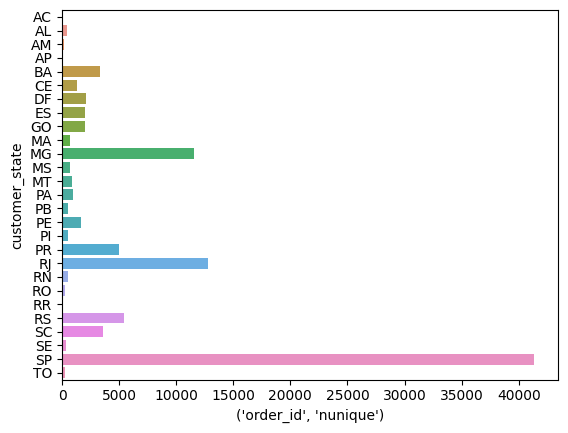

In [93]:
sns.barplot(x=per_state['order_id', 'nunique'], y=per_state.index)
plt.show()

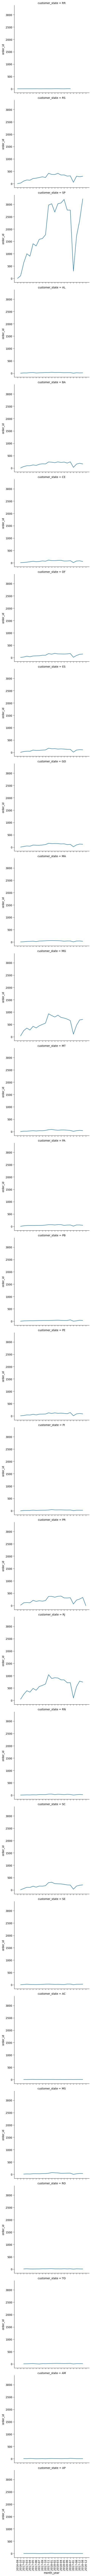

In [94]:
per_state_year2 = df.groupby(by=['month_year', 'customer_state']).agg({'order_id':'nunique'})
per_state_year2 = per_state_year2.reset_index()
sns.relplot(x=per_state_year2['month_year'].astype(str), y='order_id', col='customer_state', data=per_state_year2, kind='line', col_wrap=1)
plt.xticks(rotation=90)
plt.show()

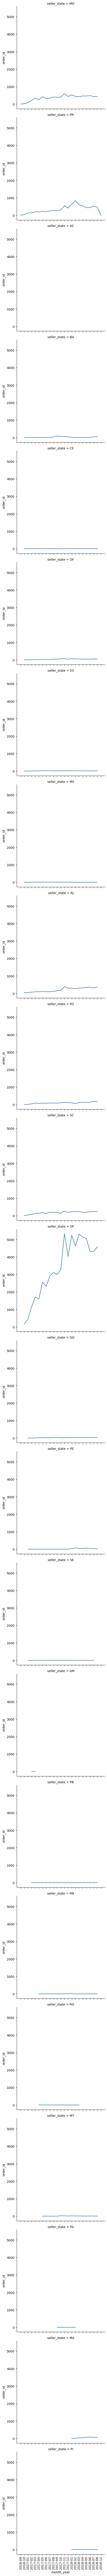

In [95]:
per_state_year3 = df.groupby(by=['month_year', 'seller_state']).agg({'order_id':'nunique'})
per_state_year3 = per_state_year3.reset_index()
sns.relplot(x=per_state_year3['month_year'].astype(str), y='order_id', col='seller_state', data=per_state_year3, kind='line', col_wrap=1)
plt.xticks(rotation=90)
plt.show() # Nenhuma tendência significativa na velocidade de adoção por estado